# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())
display(data.head(10))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,43088,2100,2609,1200,1107,823
1,26373,36423,22019,5154,4337,16523
2,3,2920,6252,440,223,709



Normalized expenditures of the sampled customers


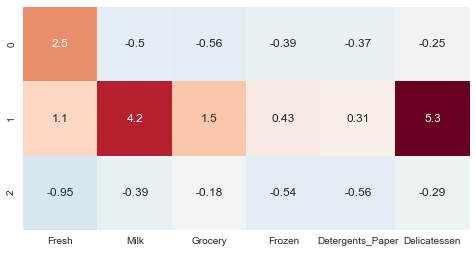

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [29, 23, 95]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

import seaborn as sns
print''
sns.heatmap((samples-data.mean())/data.std(ddof=0), annot=True, cbar=False, square=True)
print "Normalized expenditures of the sampled customers"

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** The customer 0 buys lots of fresh products (way above the median +/- 25% quartiles (Q1 to Q3)) and - compared to these - only few products from grocery stores (on the lower end of the median +/- 25% quartiles), few milk products (also on the lower end of the median/quartiles), delicatessen and detergents_paper close to the median. So the customer might be a market, or maybe an restaurant or something similar.

Customer 1 also buys fresh (way above the median +/- 25% quartiles), but a lot more milk and grocery (both way above the median/quartiles). Delicatessen is very high above the median/quartiles. Also the customoer buys of a lot of detergents_paper (on the higher end of the median/quartiles). So in this case the customer might be a large supermarket or an industrial food-producer of some kind.

Customer 2 does not buy fresh at all, but "normal" amounts of milk and grocery (inside the median/quartiles), few detergents_paper (slightly below the median/quartiles). Frozen or delicatessen is on the lower end of the median/quartiles. The customer could represent a small store that does not sell fresh products and has few freezers or a fast food restaurant that does not use fresh products.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [49]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor


for i in range(0, 6, 1):            # for all product categories (column headers) do
    label_var = list(data)[i]    # take one category

    labels = pd.DataFrame(data[label_var])     # create labels from that category
    new_data = data.copy().drop(label_var, axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size = 0.25, random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 42)
    regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "Some of the product categories are correlated with {} with a R2 score of {:4f}".format(label_var, score)

Some of the product categories are correlated with Fresh with a R2 score of -0.385750
Some of the product categories are correlated with Milk with a R2 score of 0.156275
Some of the product categories are correlated with Grocery with a R2 score of 0.681884
Some of the product categories are correlated with Frozen with a R2 score of -0.210136
Some of the product categories are correlated with Detergents_Paper with a R2 score of 0.271667
Some of the product categories are correlated with Delicatessen with a R2 score of -2.254712


The code below was given by the MLND reviewer to calculate the R2 score (coefficient of determination - Bestimmtheitsmaß) averaged over 200 cycles using the DT algorithm. The R2 score showes how much variance of the data can be explained through the model (model = learner + data), and thus indirectly the correlation between the dependent variable and the independent variables is explained.

Basically the code below is the same as above but includes the averaging over 200 runs of the DT.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor


# one of the independent features is set as target and then dropped from the features
def calculate_r_2_for_feature(data,feature):    
    new_data = data.drop(feature, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(new_data,data[feature],test_size=0.25, random_state=42)

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

''' for each feature that is set as target, the function above is run 200 times 
and then the 200 returned r2 scores are averaged'''

def r_2_mean(data,feature,runs=200):
    return np.array([calculate_r_2_for_feature(data,feature) 
                     for _ in range(runs) ]).mean().round(4)

print "{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh'))
print "{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk'))
print "{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery'))
print "{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen'))
print "{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper'))
print "{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen'))

Fresh:            -0.3785
Milk:             0.1718
Grocery:          0.6892
Frozen:           -0.2481
Detergents_Paper:  0.4119
Delicatessen:     -6.2417


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** The categories Fresh, Frozen and Delicatessen are impossible to predict with this model, since they have negative prediction scores- The categories Milk and Detergents have very low prediction scores and thus are difficult to predict. All these features are independent. 

Only the Grocery category has a high R2 score and thus can be predicted more easily by the other categories. That is why I think that the Grocery feature is not necessary for identifying the customers spending habits. The independent features above are much more important to identify the customers spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

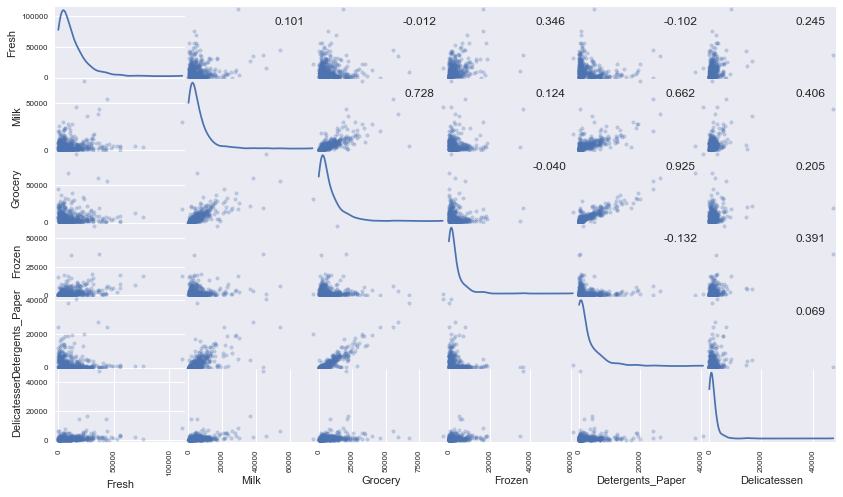

In [5]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    

The code below was given by the reviewer. It shows a heat plot that visualizes the feature correlations. The information is the same from above, but it is easier to read.

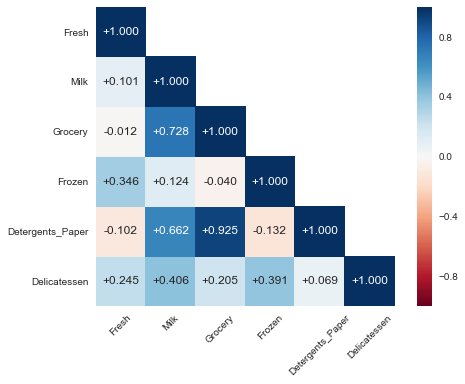

In [6]:
corr2 = data.corr()
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr2, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** The pairs of features Detergents_Paper - Grocery (corr. coef. = 0.925), Milk - Grocery (corr. coef. = 0.728) and Detergents_Paper - Milk (corr. coef. = 0.662) show some degree of correlation (although the latter show a small correlation). In the scatter plot of these pairs the data points follow a more or less linear relationship (although not normally distributed). In all other scatter plots the data points are scattered around the origin of the plot und seem to show no or a very small correlation. All these observations confirm the findings in question 2. The data of all features is highly positively skewed (to the right) with the mean beeing higher than the median in all cases.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

The code in the two cells below was provided by the reviewer. It gives a better representation of the feature distributions from the figure in cell 27 (above).

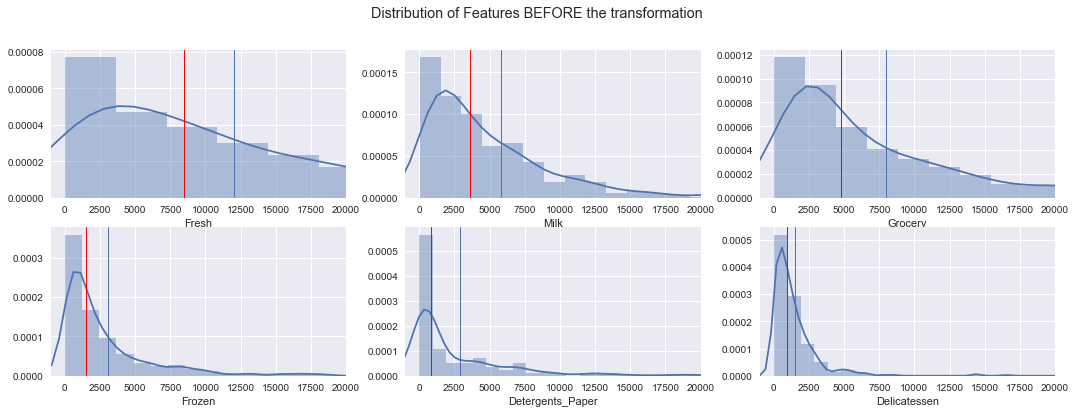

In [7]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features BEFORE the transformation')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

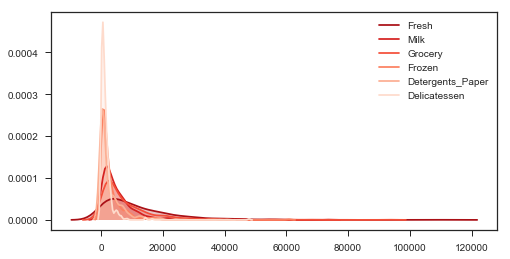

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(data[col], shade=True)
    plt.legend(loc='best')

Here the data is log transformed (below):

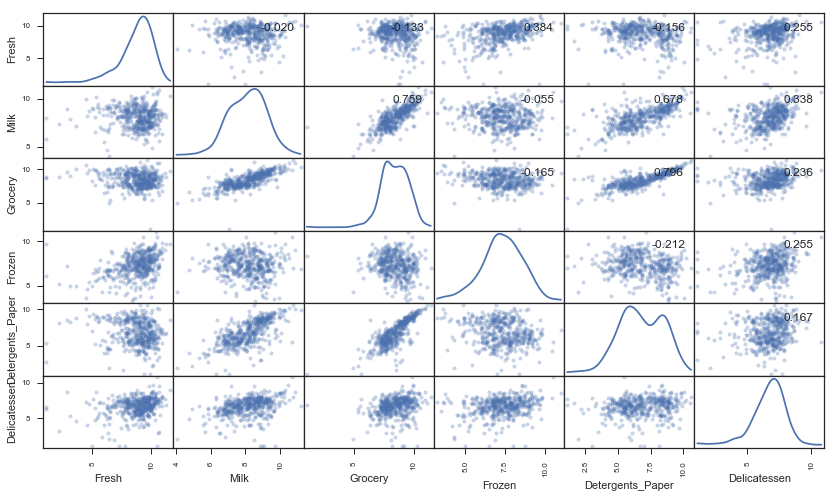

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data) # use data.apply(lambda x: np.log(x + 1)) if there arae 0 values in a dataset

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples) # use samples.apply(lambda x: np.log(x)) if there arae 0 values in a dataset

# Produce a scatter matrix for each pair of newly-transformed features
#pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
axes = pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = log_data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')


The code in the two cells below was provided by the reviewer. It gives a better representation of the feature distributions after log transformation from the figure in cell 34 (above).

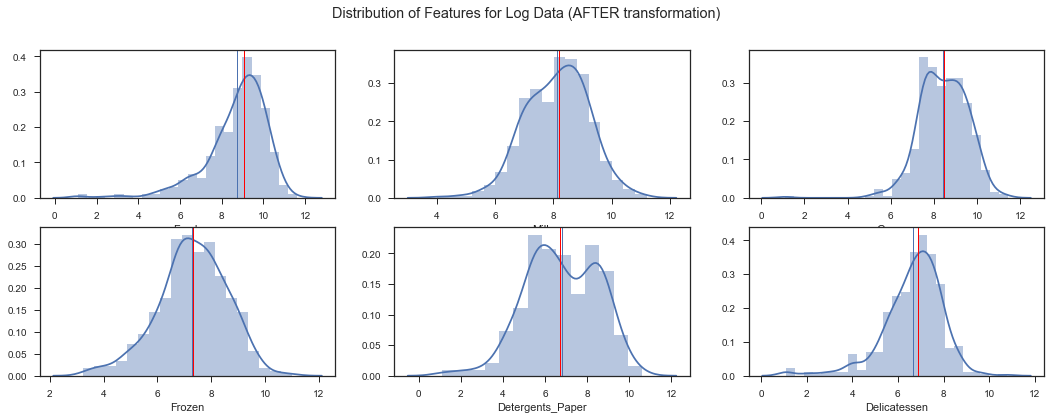

In [10]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data (AFTER transformation)')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

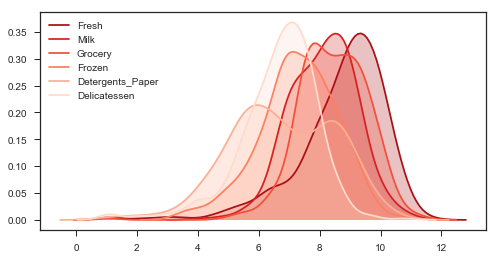

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.671000,7.649693,7.866722,7.090077,7.009409,6.712956
1,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
2,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.


Data points considered outliers for the feature 'Fresh':
        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1

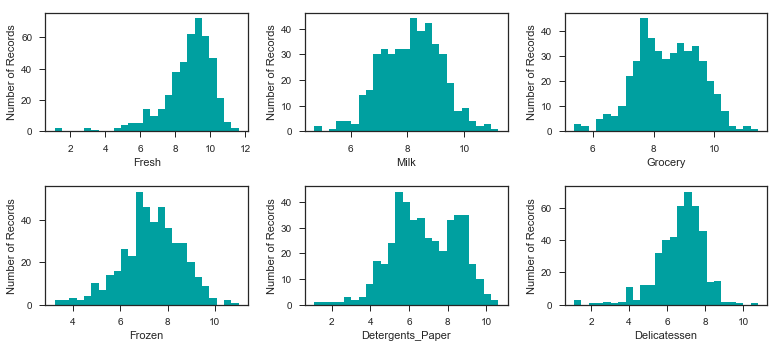

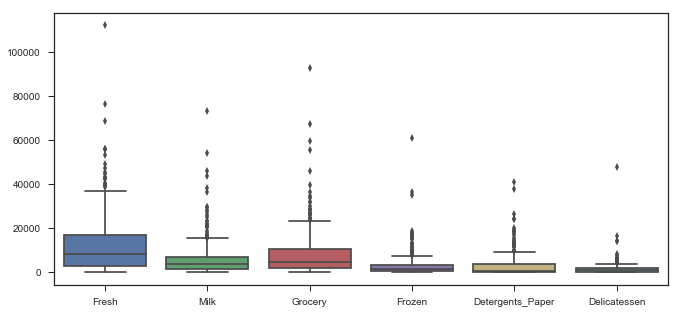

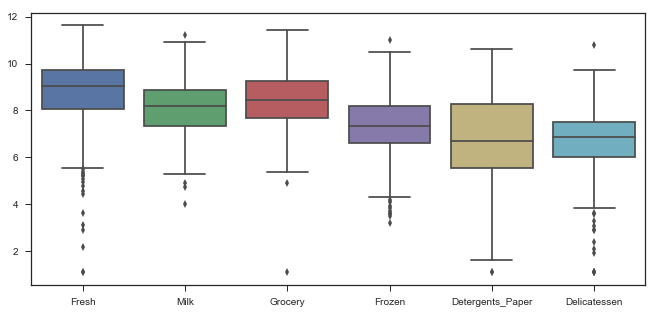

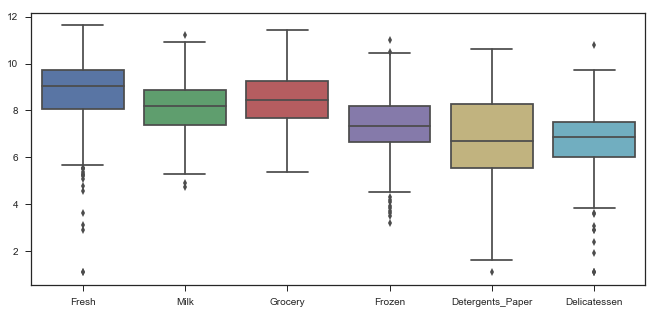

In [22]:
import seaborn as sns
from collections import Counter


outliers = []                                            # list of outliers that exist in more than 1 feature

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    # print Q1
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    # print Q3
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

   # Display the outliers
    print''
    print "Data points considered outliers for the feature '{}':".format(feature)

    outl_list = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    print outl_list


    outl_indices = outl_list.index.values                   # get the indices (clients for each outlier)
    for e in outl_indices:                                  # go through indices
        outliers.append(e)                                  # add the corresponding outliers to a list


count_outl = Counter(outliers)                              # create dict with all outliers and their occurrence number
#for i in outliers:
#    count_outl[i] = count_outl.get(i, 0) + 1

single_outl = {}                                              # dict with outliers that appear only once
for e in count_outl:
    if count_outl[e] == 1:
        single_outl[e] = count_outl[e]

print "Outliers that occur only once are NOT removed '{}':".format(single_outl)
print '' 

outliers_set = list(set(outliers))                          # create list where all outliers appear only once
print "Outliers_set: {}".format(outliers_set)
outliers_set1 = list(set(outliers)) 

for e in single_outl:                                         # remove all outliers that occur only once
    outliers_set.remove(e)

print ''    
print "Outliers_set - only multiple outliers: {}".format(outliers_set)
print '' 
print "Outliers_set1 - all outliers: {}".format(outliers_set1)
print '' 
print "Outliers that occur more than once and thus are removed '{}':".format(outliers_set)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers_set]).reset_index(drop=True)
good_data1 = log_data.drop(log_data.index[outliers_set1]).reset_index(drop=True)

print np.shape(good_data)
print np.shape(good_data1)

fig = plt.figure(figsize = (11,5));
for i,j in enumerate(good_data.columns,1):
    ax=fig.add_subplot(2, 3, i)
    ax.hist(good_data[j], bins = 25, color = '#00A0A0')
    fig.tight_layout()
    ax.set_xlabel(j)
    ax.set_ylabel("Number of Records")


fig = plt.figure(figsize = (11,5));
sns.boxplot(x=data)

fig = plt.figure(figsize = (11,5));
sns.boxplot(x=log_data)

fig = plt.figure(figsize = (11,5));
sns.boxplot(x=good_data)

plt.show()


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** There are 5 outliers for two or even 3 features. These outliers should not be removed. All the other outliers are beeing removed in order to normalize the distributions further.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

the cumulative explained variance of the 1st two commponents is 0.706817230807
the cumulative explained variance of the 1st four commponents is 0.931090109951

The cumulated sums of the explaind variances are: [ 0.44302505  0.70681723  0.82988103  0.93109011  0.97959207  1.        ]



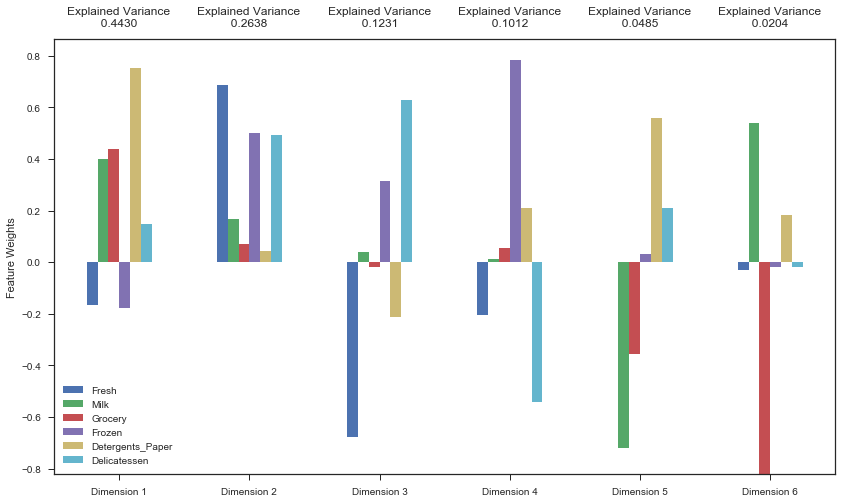

In [23]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6).fit(good_data) # only single occurence outliers removed

# TODO: Transform log_samples using the PCA fit above
pca_samples =pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

expl_var = pca.explained_variance_ratio_
cum_var2 = 0
cum_var4 = 0

for i in range(0, 2):
    cum_var2 += expl_var[i]

for i in range(0, 4):
    cum_var4 += expl_var[i]

print "the cumulative explained variance of the 1st two commponents is {}".format(cum_var2)
print "the cumulative explained variance of the 1st four commponents is {}".format(cum_var4)
print''
print "The cumulated sums of the explaind variances are: {}".format(np.cumsum(pca.explained_variance_ratio_))
print''

### Quotes on PCA 
please note that these quotes are NOT part of my answers to the project's questions

Quote from the reviewer:

"A principal component is an engineered feature made from the original features. The first dimension has 4 features correlated together and to features correlated in the other direction. The sign of the features can not be interpreted. The signs are actually reversible, and if you run it multiple times on your computer you may have noticed this. Have a look at
http://stats.stackexchange.com/questions/30348/is-it-acceptable-to-reverse-a-sign-of-a-principal-component-scorecorrelated
What we are looking for here is the largest absolute value magnitude features. These are the features that are most heavily represented.

If features have a zero value for a particular principal component, they are not expressed in that component (no interpretation of that feature in that dimension possible)

Further reading:
You can read more about how to interpret the dimensions here:
https://onlinecourses.science.psu.edu/stat505/node/54
http://setosa.io/ev/principal-component-analysis/"

*[quote="Tairi, post:4, topic:160165"]
Essentially PCA orders the components by separates the explained variance from random noise. The first principal component has the highest explained relative variance and lowest noise while the last component has the highest noise/least explained variance.

When looking at the individual components each is composed of all the original features. The higher the magnitude each feature has signifies which variables are most correlated with each component. If we have several features that have high magnitudes than this suggests that they vary/correlated with each other.
[/quote]

*Continuing the discussion from [Question 5: What the first four dimensions best represent in terms of customer spending](https://discussions.udacity.com/t/question-5-what-the-first-four-dimensions-best-represent-in-terms-of-customer-spending/177181/4):

The dimensions from PCA do indicate behaviors or categories of spending for customers. Remember that PCA re-orients the vector space for the data so that each component points in the direction of highest variance. When describing PCA dimensions, think of them like complex "features". Where x in the original space might be 'Fresh', x' in the new space is some combination of the original features, which may or may not include 'Fresh'. What's important is the correlations and weights between the features along certain directions. If a customer had a high PCA-1 value, then you can say that their spending is correlated (in proportion) to the features that have positive weights, for example.


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The variance explained by the 1st dimension is 49%. The first two dimensions explain about 74%, and the first four dimensions explain about 93% of the variance in the dataset. Each dimension explains a customer behaviour. 
 
1. The strongest customer behaviour is represented by the first dimension.  The axis of this dimension is aligned close to the "Detergents_Paper" axis in the original data. This behaviour can be described as follows: with increased buying of detergents and paper, 1) the buying of grocery and milk also increases while 2) the buying of fresh and frozen products decreases. According to the first dimension we hace some customers that purchae a lot of milk, grocery and detergents_paper, while other customers purchase very few of these, items hence the spread in the data (in the 1 principal direction)

2. In the second client behaviour the customer with increased buying of fresh products: 1) the buying of frozen and deli products also increases strongly, 2) milk and grocery increases only very slightly while 3) buying detergents and paper rather decreases. According to the second dimension there are som customers that buy a lot of fresh, frozen and delicatessen products (maybe restaurants?) while others buy only very few of these products, hence the spread in the data (in the 2 principal direction). 
    
3. In the third behaviour the client with increased buying of fresh: 1) decreases strongly buying of deli and frozen products. 2) Grocery remains almost constant and 3) milk increases slightly. According to the third principal component there are customers that buy lots of fresh products, but much less frozen products and milk (maybe restaurants or café?).

4. The fourth customer behaviour can be described as follows: With increased buying of frozen products: 1) buying of detergents and paper also increases while 2) buying of delicatessen, fresh und milk products decreases. These customers might be rather retailers.

The code below is given by the reviewer. It gives a nice graphical representation of the cumulative explained variance.

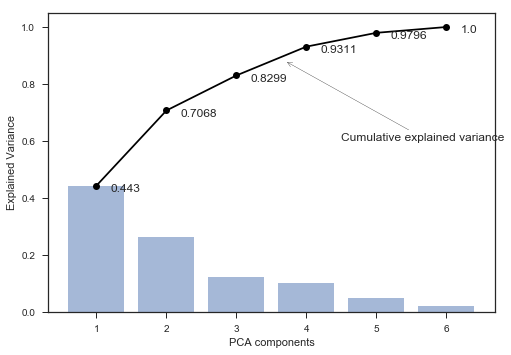

In [24]:
# create an x-axis variable for each pca component
x = np.arange(1,7)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative explained variance', xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xticks(range(1,7))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [25]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.5684,1.0850,-1.4044,-0.5784,0.6738,0.2157
1,2.8096,3.6459,1.0567,-0.5186,-0.6999,0.1811
2,0.5023,-6.0080,5.0055,0.3870,-0.8576,-0.3129


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [26]:

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)
pca1 = PCA(n_components = 2).fit(good_data1) # all outliers removed

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)
reduced_data1 = pca.transform(good_data1)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data1 = pd.DataFrame(reduced_data1, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [27]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.5684,1.0850
1,2.8096,3.6459
2,0.5023,-6.0080


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

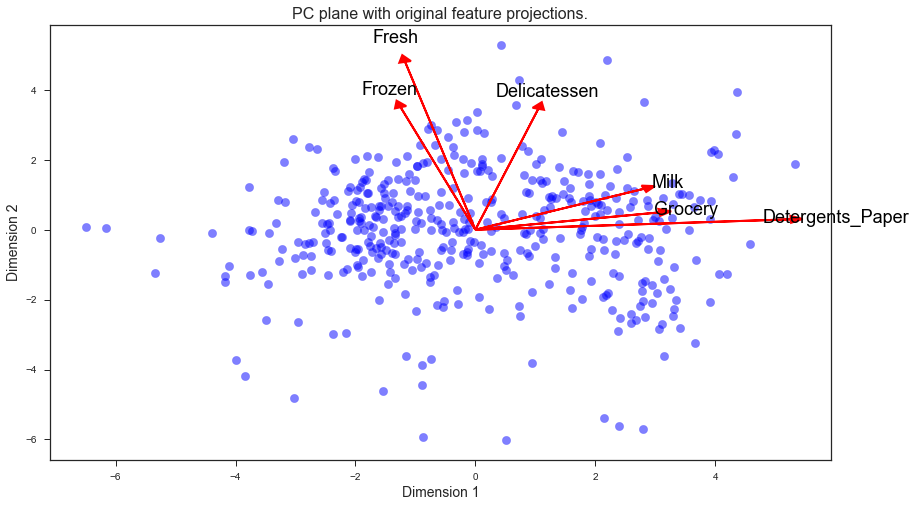

In [28]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

The 2 features that are most strongly correlated with the first component, are Detergents_Paper and Grocery. This observation is confirmed by the pca_results plot from above. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

Some helpful links from the reviewer:

http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/mixture.html

http://www.nickgillian.com/wiki/pmwiki.php/GRT/GMMClassifier

http://playwidtech.blogspot.hk/2013/02/k-means-clustering-advantages-and.html

http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm

http://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means

http://www.r-bloggers.com/k-means-clustering-is-not-a-free-lunch/

http://www.r-bloggers.com/pca-and-k-means-clustering-of-delta-aircraft/

https://shapeofdata.wordpress.com/2013/07/30/k-means/

http://mlg.eng.cam.ac.uk/tutorials/06/cb.pdf

https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian


### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** 
taken from [Link1](https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means) and [Link2](https://www.quora.com/What-are-the-advantages-of-K-Means-clustering)

The advantages of k-means are:
- simple, easy to implement
- fast and efficient in terms of computational cost, typically O(K * n * d) (k = # clusters, n = # iterr., d = # datapoints)
- works well on spherical clusters

K-Means does not seem a good algorithm for this case because the assumptions it makes, do not hold:
- every data point is part of only one cluster
- balanced cluster size within the dataset
- joint distribution of features within each cluster is spherical: this means that features within a cluster have equal variance, and also features are independent of each other
- clusters have similar density


The data shows no distinctive clusters and is unevenly distributed, but k-means cannot find non-convex clusters or clusters with unusual shapes. Acually K-Means is not really suited for discovering clusters, partly  because it discovers structures even in uniform data. It is better suited to quantify structues (by reducing the SSE). Also K-Means uses "hard" clustering in its assignment process, meaning that in each assignment step  we are 100% certain that a given data point (dp) is part of a certain cluster. Thusa given dp can be only part of one cluster. In each step we can revise this "belief" and the dp can change the cluster. However, in each iteration, we are absolutely certain as to which cluster the point belongs to. 
Taken from (K_means vs. GMM)[https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian]

GMM implements the  expectation-maximization (EM) algorithm and uses "soft-clustering", meaning that each dp is - with a certain probability - part of all several clusters. Thus GMM can find overlapping clusters and K-means cannot.

The resulting advantage of the GMM is that it can find ring-shaped clusters, or in general more complex formed clusters, because it takes covariances or variances of the data points into account.

Given that the biplot does not show distinct, spherical clusters but might have one ring-shaped cluster, I choose GMM as clustering algorithm for this task.



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
 - Assign the silhouette score to `score` and print the result.

In [38]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
#clusterer = KMeans(n_clusters = 3, init = 'k-means++', random_state=10).fit(reduced_data)
for k in range(2,4):
    clusterer = GMM(n_components = k).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
#centers = clusterer.cluster_centers_
    centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print "The silhouette score for {} culsters is {}".format(k, score)

The silhouette score for 2 culsters is 0.411818864386
The silhouette score for 3 culsters is 0.372313708076


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** The GMM clusterer has its max. silhouette score of 0.412 for 2 clusters. For 3 clusters the score is 0.372 and for 4 clusters it is 0.333.

Analisis with ALL outliers removed.

In [41]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
#clusterer = KMeans(n_clusters = 3, init = 'k-means++', random_state=10).fit(reduced_data)
for k in range(2,3):
    clusterer = GMM(n_components = k).fit(reduced_data1)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data1)

# TODO: Find the cluster centers
#centers = clusterer.cluster_centers_
    centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data1, preds)
    print "The silhouette score for {} culsters is {}".format(k, score)

The silhouette score for 2 culsters is 0.441963285143


**Answer:** With all outliers removed, the max. silhouette score is also reached for 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

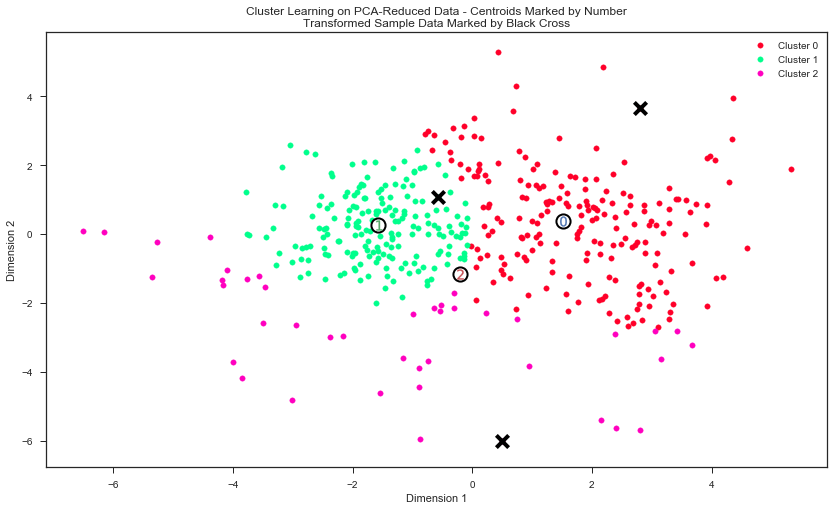

In [39]:
### Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5858.0,7094.0,10242.0,1289.0,3307.0,1205.0
Segment 1,9134.0,1936.0,2519.0,2130.0,301.0,702.0


(3, 6)


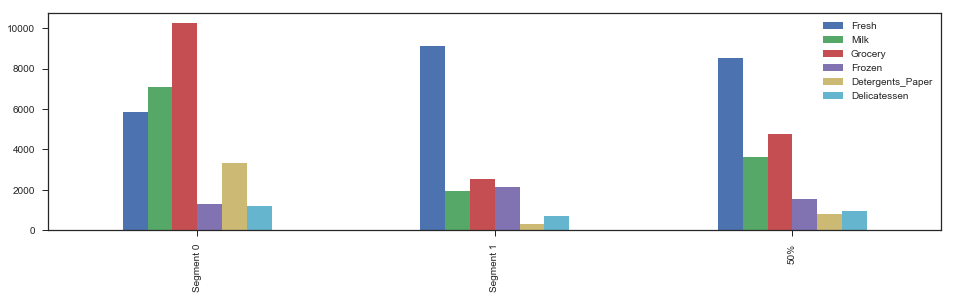

In [42]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

print np.shape(true_centers)


The code below was given by the reviwer and modified (mean() and data.std(ddof=1) were removed). The figure allows for comparing the 3 segments (sample customers) to the median (50% quartile).

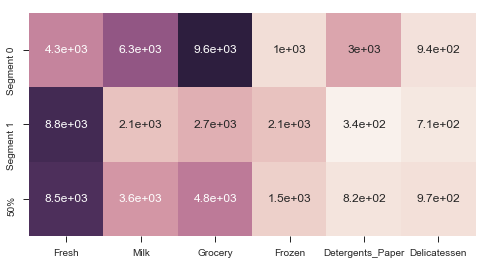

In [34]:
sns.heatmap((true_centers), annot=True, cbar=False, square=True)

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** (ORIGINALLY DONE FOR 3 CLUSTERS (ONLY SINGLE OUTLIERS REMOVED)!!! DESCRIPTION HAS NOT BEEN ADAPTED) Segment 0 represents establishments that buy mostly fresh (close to the median), much less milk and grocery (both on the lower end of the median +/- 25% quartiles), almost no detergents_paper (on the lower end of the median +/- 25% quartiles) and some delicatessen (close to the median). This segment could represent restaurants.

Segment 2 represents establishments that have similar properties to cluster 0 but buy less fresh (on the lower end of the median +/- 25% quartiles) and a little more grocery (close to the median) in comparison. Milk, Frozen and Delicatessen purchases are also inside the median +/- 25% quartiles. This segment could also represent restaurants.

Segment 1 represents establishments that buy huge amounts of grocery, milk and detergents_paper (all above the median +/- 25% quartiles). Frozen and Delicatessen are inside the median +/- 25% quartiles. This customer segment could represent large supermarkets.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [35]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:** (ORIGINALLY DONE FOR 3 CLUSTERS (ONLY SINGLE OUTLIERS REMOVED)!!! DESCRIPTION HAS NOT BEEN ADAPTED)The predictions above coincide with my considerations from question 1. The sample point 0 and segment 0 represent restaurants (?) that use a lot of fresh products and almost no  detergents and paper. Sample 2 and segment 2 also represent restaurants, but smaller and maybe fast food. The segment 2is similar to segment 0 but less fresh is used and more grocery. Finally, Sample 1 and Segment 1's characteristics represent large supermarkets, that sell lots of grocery, fresh products and detergents_paper.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

Quote from the reviewer:

"The two clusters that we have in our model reveal two different consumer profiles that can be tested via A/B test. To better assess the impact of the changes on the delivery service, we would have to split the segment 0 and segment 1 into subgroups measuring its consequences within a delta time. Hypothetically we can raise a scenario where the segment 0 is A/B tested. For this we divide the segment 0 (can also be implemented in segment 1) into two sub-groups of establishments where only one of them would suffer the implementation of the new delivery period of three days a week, and the another would remain as a control with five days a week as usual. After a certain period of time, we could, through the consumption levels of the establishments, come to some conclusions, such as: whether the new frequency of deliveries is sufficient or not for a buyer. Where a sensible increase in overall consumption of all products may indicate the need for the estabelishment to mantain a storage because of the decreasing delivery frequency; or if it negatively affects the consumption profile of certain products, like groups of costumers who have greater buying fresh produce that can be negatively impacted, precisely because of the demand for fresh products with a higher delivery frequency. We can not say that the change in frequency will affect equally all customers because of the different consumption profiles that are part of the two segments. There will therefore consumers that will be affected, and possibly groups of buyers who will not undergo any change."

**Answer:** We can just try the new delivery scheme on some customers of each segment. The hope is that the customers that react negatively, are all from the same segment. So we create a small subgroup of "test customers" in each segment and give them the new delivery schedule. After some time we compare the customers reaction to a control group (or simply the rest of the customers of the segment. Then we see if there are complaints in the test group or if test customers change their purchase behaviour compared to the control group.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** Now that we have our two or three customer segments, we can train asupervised learner on the customer segments as target varables. Then whe can predict the customer segments for the new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

(48L,)
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]
(5L,)
[128, 154, 65, 66, 75]


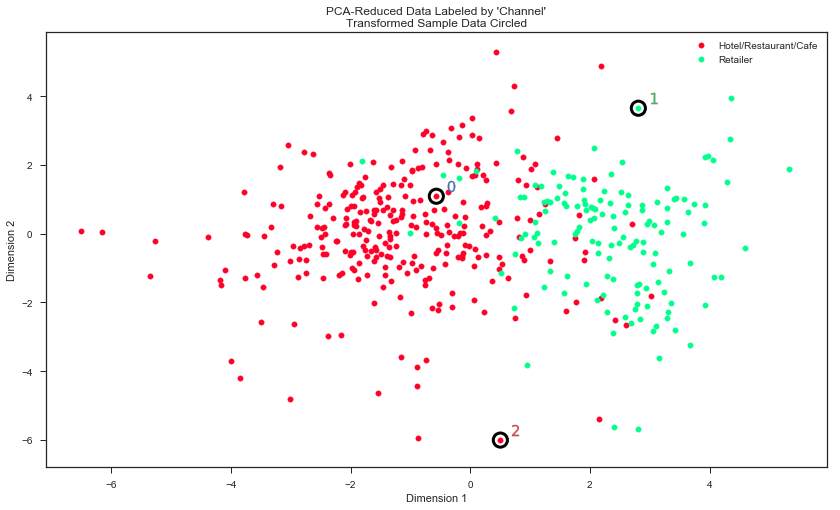

In [36]:
print np.shape(outliers)
print outliers
print np.shape(outliers_set)
print outliers_set

# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers_set, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** (ORIGINALLY DONE FOR 3 CLUSTERS (ONLY SINGLE OUTLIERS REMOVED)!!! DESCRIPTION HAS NOT BEEN ADAPTED)The clustering algorithm found 3 clusters, while the underlying distribution consists of 2 cluster. However these two groups from the underlying distribution are well represented by the clustering, as the two main clusters.

However the "real" groups penetrate themself a lot, it seems like part of the Ho/Re/Ca behaves like a retailer, at leaset from the point of view of the clustering algorithm. The clustering algorithm was not able to figure out this penetration. So according to this distribution there are no customer segments (at least no segments in this project) that can be classified as purely Retailers or purely Ho/Re/Ca. The segments found by the clustering are simplified compared to the real distributions, or "polluted". Still they show the tendency of how retailers and Ho/Re/Ca separate. So in a sense I would say that the classifications are consistent, but the border between the segments is  in reality very blurred, compared to the sharp border found by the  clustering algorithm.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.